In [2]:
import os
import h5py
import argparse

def count_total_episodes(data_path: str):
    """
    遍历LIBERO数据集目录，计算所有HDF5文件中的总episodes数。

    Args:
        data_path (str): 数据集的根目录路径。

    Returns:
        int: 总的episodes数量。
    """
    if not os.path.isdir(data_path):
        print(f"错误: 提供的路径 '{data_path}' 不是一个有效的目录。")
        return 0

    total_episodes = 0
    print(f"开始扫描目录: {data_path}")

    # 遍历数据集的各个套件 (e.g., 'libero_spatial', 'libero_object', etc.)
    for suite in os.listdir(data_path):
        if not suite.startswith('libero'):
            continue
        
        suite_path = os.path.join(data_path, suite)
        
        if not os.path.isdir(suite_path):
            continue

        print(f"\n--- 正在处理套件: {suite} ---")
        
        # 找到套件目录中所有的.hdf5文件
        hdf5_files_in_suite = [f for f in os.listdir(suite_path) if f.endswith('.hdf5')]
        
        if not hdf5_files_in_suite:
            print("  - 未找到 .hdf5 文件。")
            continue

        suite_episode_count = 0
        # 遍历每个hdf5文件
        for demo_file in hdf5_files_in_suite:
            file_path = os.path.join(suite_path, demo_file)
            try:
                with h5py.File(file_path, 'r') as f:
                    # 'data' 键下面包含了所有的episodes
                    if 'data' in f:
                        # episodes的数量就是'data' group下的键的数量
                        num_episodes_in_file = len(f['data'].keys())
                        suite_episode_count += num_episodes_in_file
                    else:
                        print(f"  - 警告: 文件 '{demo_file}' 中没有找到 'data' 键。")
            except Exception as e:
                print(f"  - 错误: 无法读取或处理文件 '{demo_file}'. 错误信息: {e}")
        
        print(f"  - 在 {len(hdf5_files_in_suite)} 个文件中找到 {suite_episode_count} 个 episodes。")
        total_episodes += suite_episode_count
            
    return total_episodes

if __name__ == '__main__':

    final_count = count_total_episodes('/mnt/mnt/public/fangzhirui/zrc/UniSkill/diffusion/workspace/datasets/LIBER0')
    print("\n=================================================")
    print(f"在路径 'LIBERO' 下共找到 {final_count} 个 episodes。")
    print("=================================================")

开始扫描目录: /mnt/mnt/public/fangzhirui/zrc/UniSkill/diffusion/workspace/datasets/LIBER0

--- 正在处理套件: libero_spatial ---
  - 在 10 个文件中找到 500 个 episodes。

--- 正在处理套件: libero_goal ---
  - 在 10 个文件中找到 500 个 episodes。

--- 正在处理套件: libero_object ---
  - 在 10 个文件中找到 500 个 episodes。

--- 正在处理套件: libero_10 ---
  - 在 10 个文件中找到 500 个 episodes。

--- 正在处理套件: libero_90 ---
  - 在 90 个文件中找到 4500 个 episodes。

在路径 'LIBERO' 下共找到 6500 个 episodes。


# 查看 libero hdf5 格式

In [ ]:
import h5py

# 把这里的路径换成你的一个 .hdf5 文件路径
file_path = 'LIBER0/libero_10/KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it_demo.hdf5'

with h5py.File(file_path, 'r') as f:
    print("文件中的键 (Keys): %s" % list(f.keys()))

In [ ]:
import h5py
import sys
import os

def print_hdf5_structure(file_path):
    """
    递归打印 HDF5 文件的结构，包括组、数据集、形状和数据类型。
    """
    try:
        with h5py.File(file_path, 'r') as f:
            print(f"--- Structure of: {file_path} ---")
            def print_item(name, obj):
                indent = '  ' * name.count('/')
                if isinstance(obj, h5py.Group):
                    print(f"{indent}Group: {os.path.basename(name)}")
                elif isinstance(obj, h5py.Dataset):
                    print(f"{indent}Dataset: {os.path.basename(name)}")
                    print(f"{indent}  - Path: '{name}'")
                    print(f"{indent}  - Shape: {obj.shape}")
                    print(f"{indent}  - Dtype: {obj.dtype}")
            f.visititems(print_item)
            print("--- End of Structure ---")
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

if __name__ == '__main__':
    # --- !!! 请将这里修改为你自己的一个 .hdf5 文件路径 !!! ---
    # 例如: '/workspace/datasets/LIBERO/libero_spatial/some_demo_file.hdf5'
    example_file = 'LIBER0/libero_10/KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it_demo.hdf5' 

    print_hdf5_structure(example_file)

成功读取视频！
视频的形状是: (272, 128, 128, 3)
第一帧的形状是: (128, 128, 3)


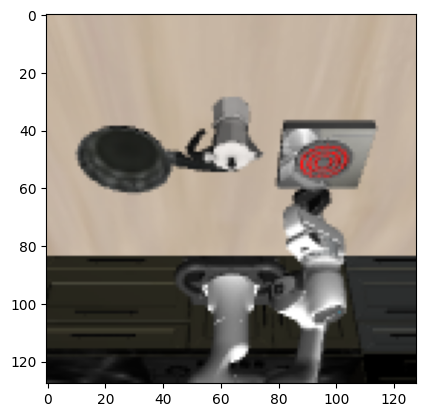

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def read_video_from_hdf5(file_path, dataset_path):
    try:
        with h5py.File(file_path, 'r') as f:
            if dataset_path not in f:
                print(f"错误: 在文件 '{file_path}' 中找不到路径 '{dataset_path}'")
                return None

            video_array = f[dataset_path][:]
            return video_array

    except FileNotFoundError:
        print(f"错误: 文件未找到 -> {file_path}")
        return None
    except Exception as e:
        print(f"读取时发生未知错误: {e}")
        return None

if __name__ == "__main__":
    HDF5_FILE_PATH = "LIBER0/libero_10/KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it_demo.hdf5" 

    INTERNAL_DATASET_PATH = "data/demo_0/obs/agentview_rgb" 

    video = read_video_from_hdf5(HDF5_FILE_PATH, INTERNAL_DATASET_PATH)

    if video is not None:
        print("成功读取视频！")
        print(f"视频的形状是: {video.shape}") 
        first_frame = video[100]
        print(f"第一帧的形状是: {first_frame.shape}")
        plt.imshow(first_frame)

# 查看 sthsthv2 格式

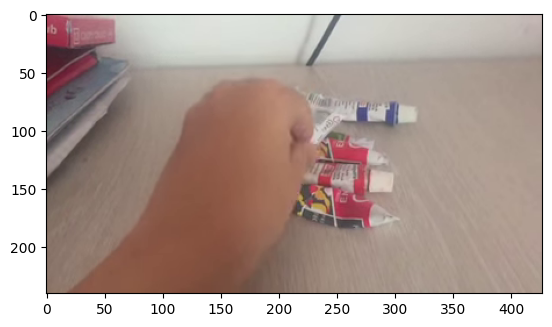

In [15]:
import cv2
import matplotlib.pyplot as plt

def display_webm_frame(video_path, frame_number):

    video_capture = cv2.VideoCapture(video_path)

    if not video_capture.isOpened():
        print(f"错误: 无法打开视频文件: {video_path}")
        return

    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    if not (0 <= frame_number < total_frames):
        print(f"错误: 帧编号 {frame_number} 超出范围。")
        print(f"该视频共有 {total_frames} 帧 (有效索引为 0 到 {total_frames - 1})。")
        video_capture.release() # 释放资源
        return

    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    ret, frame = video_capture.read()

    video_capture.release()

    if not ret:
        print(f"错误: 无法读取第 {frame_number} 帧。")
        return

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.imshow(frame_rgb)

# --- 主程序 ---
if __name__ == "__main__":
    DATA_ROOT = 'ststv2'
    VIDEO_ID = '1'
    VIDEO_PATH = f"{DATA_ROOT}/20bn-something-something-v2/{VIDEO_ID}.webm"

    FRAME_TO_SHOW = 30 

    display_webm_frame(VIDEO_PATH, FRAME_TO_SHOW)

# 修复 sthsthv2

In [25]:
import os
import subprocess

def reencode_video_file(input_path, output_path):
    """
    使用 ffmpeg 对视频文件进行重新编码，以修复深层数据损坏。
    
    参数:
    input_path (str): 原始损坏视频的文件路径。
    output_path (str): 重新编码后视频的保存路径。
    """
    if not os.path.exists(input_path):
        print(f"错误: 输入文件不存在: {input_path}")
        return False

    output_dir = os.path.dirname(output_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # --- 关键变化：移除了 '-c', 'copy' ---
    # 这会强制 ffmpeg 解码所有帧并用默认编码器（通常是 libvpx-vp9 for webm）重新编码
    command = [
        'ffmpeg',
        '-i', input_path,
        '-y',  # 覆盖输出文件
        '-loglevel', 'error',
        output_path
    ]

    print(f"--- 正在对视频进行重新编码 (这可能需要一些时间) ---")
    print(f"输入: {input_path}")
    print(f"输出: {output_path}")

    try:
        subprocess.run(command, check=True, capture_output=True, text=True)
        print("✅ 视频重新编码成功！")
        return True
    except FileNotFoundError:
        print("错误: 'ffmpeg' 命令未找到。")
        return False
    except subprocess.CalledProcessError as e:
        print("❌ 视频重新编码失败。")
        print(f"ffmpeg 错误信息:\n{e.stderr}")
        return False

# --- 主程序 ---
if __name__ == "__main__":
    DATA_ROOT = 'ststv2'
    VIDEO_ID = '3466'
    
    input_video_path = os.path.join(DATA_ROOT, '20bn-something-something-v2', f"{VIDEO_ID}.webm")
    
    # 建议使用一个新的输出目录，以区分不同的修复方法
    dest_dir = os.path.join(DATA_ROOT, '20bn-something-something-v2-fix')
    output_video_path = os.path.join(dest_dir, f"{VIDEO_ID}.webm")
    
    reencode_video_file(input_video_path, output_video_path)

--- 正在对视频进行重新编码 (这可能需要一些时间) ---
输入: ststv2/20bn-something-something-v2/3466.webm
输出: ststv2/20bn-something-something-v2-fix/3466.webm
✅ 视频重新编码成功！


--- 正在使用 decord 验证视频 ---
文件路径: ststv2/20bn-something-something-v2-fix/38916.webm
[步骤 1/3] ✅ 成功打开视频。总帧数: 58
[步骤 2/3] ✅ 成功解码第一帧。 帧形状: (240, 427, 3)
[步骤 3/3] ✅ 成功解码最后一帧 (索引: 57)。

🎉 验证成功！该视频文件已修复，可以被 decord 正确处理。


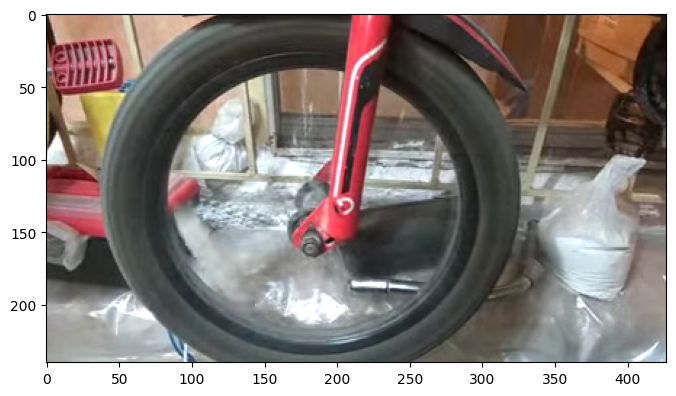

In [4]:
import decord
import matplotlib.pyplot as plt
import os

def verify_video_with_decord(video_path):
    """
    使用 decord 库验证视频文件是否可以被正确读取，
    特别是测试对最后一帧的跳转（seek）操作。
    
    参数:
    video_path (str): 待验证的视频文件路径。
    """
    # 1. 检查文件是否存在
    if not os.path.exists(video_path):
        print(f"错误: 视频文件不存在: {video_path}")
        return

    print(f"--- 正在使用 decord 验证视频 ---")
    print(f"文件路径: {video_path}")

    try:
        # 2. 尝试打开视频文件
        # 如果这一步失败，说明文件容器格式有问题
        vr = decord.VideoReader(video_path)
        video_len = len(vr)
        print(f"[步骤 1/3] ✅ 成功打开视频。总帧数: {video_len}")

        if video_len == 0:
            print("警告: 视频总帧数为 0，无法继续验证。")
            return

        # 3. 尝试读取第一帧
        # 这是为了确认解码器可以正常工作
        first_frame = vr[0].asnumpy()
        print(f"[步骤 2/3] ✅ 成功解码第一帧。 帧形状: {first_frame.shape}")

        # 4. 关键测试：尝试读取最后一帧
        # 这会强制 decord 执行一个 seek 操作，是原始错误的触发点
        last_frame_idx = video_len - 1
        last_frame = vr[last_frame_idx].asnumpy()
        print(f"[步骤 3/3] ✅ 成功解码最后一帧 (索引: {last_frame_idx})。")
        print("\n🎉 验证成功！该视频文件已修复，可以被 decord 正确处理。")

        # 5. 使用 Matplotlib 显示最后一帧作为视觉确认
        plt.figure(figsize=(8, 5))
        plt.imshow(last_frame)

    except decord.DECORDError as e:
        # 捕获 decord 的特定错误
        print("❌ 验证失败！")
        print("在处理过程中 decord 抛出错误，文件可能仍存在问题。")
        print(f"错误详情: {e}")
    except Exception as e:
        # 捕获其他可能的未知错误
        print("❌ 验证失败！")
        print(f"发生了未知错误: {e}")


# --- 主程序 ---
if __name__ == "__main__":
    # --- 配置路径 ---
    DATA_ROOT = 'ststv2'
    VIDEO_ID = '38916'
    
    # --- 关键：将路径指向修复后的视频文件 ---
    FIXED_VIDEO_PATH = os.path.join(DATA_ROOT, '20bn-something-something-v2-fix', f"{VIDEO_ID}.webm")

    # --- 执行验证 ---
    verify_video_with_decord(FIXED_VIDEO_PATH)